In [2]:
from nltk.corpus import brown


In [3]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [4]:
$pip install nltk==3.3

SyntaxError: invalid syntax (<ipython-input-4-e66383372979>, line 1)

In [5]:
import nltk

In [6]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to C:\Users\Syed Ali
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [7]:
exit()

In [1]:
from nltk.corpus import twitter_samples

In [2]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [3]:
twitter_samples.strings('tweets.20150430-223406.json')

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…",
 'RT @Nigel_Farage: Make sure you tune in to #AskNigelFarage tonight on BBC 1 at 22:50! #UKIP http://t.co/ogHSc2Rsr2',
 'RT @joannetallis: Ed Milliband is an embarrassment. Would you want him representing the UK?!  #bbcqt vote @Conservatives',
 "RT @abstex: The FT is backing the Tories. On an unrelated note, here's a photo of FT leader writer Jonathan Ford (next to Boris) http://t.c…",
 "RT

In [4]:
from nltk.corpus import twitter_samples

tweets = twitter_samples.strings('positive_tweets.json')
tweets_tokens = twitter_samples.tokenized('positive_tweets.json')

In [1]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))


[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


In [2]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


In [3]:
...

import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [4]:
...
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [5]:
...
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#print(remove_noise(tweet_tokens[0], stop_words))

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
    
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [6]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [7]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [8]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [9]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [10]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2046.4 : 1.0
                      :) = True           Positi : Negati =   1003.0 : 1.0
                     sad = True           Negati : Positi =     30.9 : 1.0
                     bam = True           Positi : Negati =     22.0 : 1.0
                  arrive = True           Positi : Negati =     20.1 : 1.0
                     via = True           Positi : Negati =     19.0 : 1.0
               community = True           Positi : Negati =     17.9 : 1.0
                    blog = True           Positi : Negati =     15.9 : 1.0
                     x15 = True           Negati : Positi =     14.8 : 1.0
                     bro = True           Positi : Negati =     11.8 : 1.0
None


In [11]:
from nltk.tokenize import word_tokenize

custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [12]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.9956666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2085.0 : 1.0
                      :) = True           Positi : Negati =    995.5 : 1.0
                     sad = True           Negati : Positi =     24.7 : 1.0
                follower = True           Positi : Negati =     22.4 : 1.0
                     bam = True           Positi : Negati =     21.4 : 1.0
                  arrive = True           Positi : Negati =     20.8 : 1.0
                     x15 = True           Negati : Positi =     17.2 : 1.0
                    cool = True           Positi : Negati =     16.8 : 1.0
                followed = True           Negati : Positi =     15.2 : 1.0
                    blog = True           Positi : Negati =     14.8 : 1.0
None
I ordered just once from TerribleCo, 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it 
already...'

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive tablet use learn step nabi thrilled learn skype already'

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens tablet use learn step nabi thrill learn skype alreadi'

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()

0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

SyntaxError: EOL while scanning string literal (<ipython-input-14-b2f9fb01cf2d>, line 40)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive tablet use learn step nabi thrilled learn skype already'

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens tablet use learn step nabi thrill learn skype alreadi'

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()

0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

SyntaxError: EOL while scanning string literal (<ipython-input-15-b2f9fb01cf2d>, line 40)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive tablet use learn step nabi thrilled learn skype already'

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens tablet use learn step nabi thrill learn skype alreadi'

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()

0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

SyntaxError: invalid syntax (<ipython-input-16-2beb19970669>, line 71)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive tablet use learn step nabi thrilled learn skype already'

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens tablet use learn step nabi thrill learn skype alreadi'

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()


ModuleNotFoundError: No module named 'wordcloud'

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


'G:\New' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
! pip install wordcloud


In [20]:
! pip install textblob

In [21]:
! pip install pandas

In [22]:
! pip install matplotlib

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive tablet use learn step nabi thrilled learn skype already'

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens tablet use learn step nabi thrill learn skype alreadi'

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()

FileNotFoundError: [Errno 2] No such file or directory: '1429_1.csv'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))
df['reviews.rating'].value_counts().plot(kind='bar')

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference

## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]

stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]

st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]

## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()

FileNotFoundError: [Errno 2] No such file or directory: '1429_1.csv'

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("1429_1.csv")
amz_reviews.shape (34660, 21)


FileNotFoundError: [Errno 2] No such file or directory: '1429_1.csv'

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("C:\Users\Syed Ali Haider\Desktop\1429_1.csv")
amz_reviews.shape (34660, 21)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-26-45b53d1b0cc0>, line 11)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv(r'C:\Users\Syed Ali Haider\Desktop\1429_1.csv')
amz_reviews.shape (34660, 21)

G:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


TypeError: 'tuple' object is not callable

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv("C:\Users\Syed Ali Haider\Desktop\1429_1.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-28-0b501541a860>, line 11)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

amz_reviews = pd.read_csv(r'C:\Users\Syed Ali Haider\Desktop\1429_1.csv')

In [30]:
amz_reviews.shape
(34660, 21)

amz_reviews.columns
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

NameError: name 'Index' is not defined

In [31]:
amz_reviews.shape(34660, 21)


TypeError: 'tuple' object is not callable

In [32]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

<AxesSubplot:>

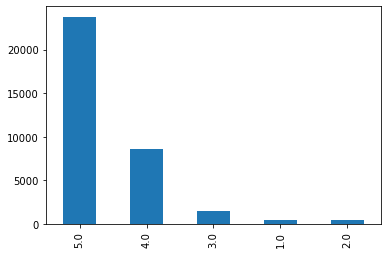

In [33]:
df['reviews.rating'].value_counts().plot(kind='bar')


In [34]:
## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)


In [35]:
## Before lowercasing 
df['reviews.text'][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [36]:
## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2]

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

In [37]:
## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]

'ssswswws'

In [38]:
df['reviews.text'][2]

'ssswswws'

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

customer = pd.read_csv('../input/bank-reviewcomplaint-analysis/BankReviews.csv', encoding='windows-1252' )
customer.head()


FileNotFoundError: [Errno 2] No such file or directory: '../input/bank-reviewcomplaint-analysis/BankReviews.csv'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

customer = pd.read_csv('C:\Users\Syed Ali Haider\Desktop\BankReviews.csv' )
customer.head()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-171eb3bb5ee6>, line 19)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

customer = pd.read_csv(r'C:\Users\Syed Ali Haider\Desktop\BankReviews.csv' )

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 367: invalid start byte

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

customer = pd.read_csv('../input/bank-reviewcomplaint-analysis/BankReviews.csv', encoding='windows-1252' )
customer.head()
customer.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-4-d62a1b573bf4>, line 19)

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

In [6]:
import nltk
nltk.download('pandas')

[nltk_data] Error loading pandas: Package 'pandas' not found in index


False

In [7]:
!pip install pandas

In [8]:
!pip install numpy

In [9]:
!pip install seaborn

In [10]:
customer = pd.read_csv('../input/bank-reviewcomplaint-analysis/BankReviews.csv', encoding='windows-1252' )
customer.head()


FileNotFoundError: [Errno 2] No such file or directory: '../input/bank-reviewcomplaint-analysis/BankReviews.csv'

In [11]:
customer = pd.read_csv(r'../input/bank-reviewcomplaint-analysis/BankReviews.csv', encoding='windows-1252' )
customer.head()


FileNotFoundError: [Errno 2] No such file or directory: '../input/bank-reviewcomplaint-analysis/BankReviews.csv'

In [12]:
customer = pd.read_csv('../input/bank-reviewcomplaint-analysis/BankReviews.csv', encoding='windows-1252' )
customer.head()


FileNotFoundError: [Errno 2] No such file or directory: '../input/bank-reviewcomplaint-analysis/BankReviews.csv'

In [13]:
customer = pd.read_csv('BankReviews.csv', encoding='windows-1252' )
customer.head()


FileNotFoundError: [Errno 2] No such file or directory: 'BankReviews.csv'

In [14]:
customer = pd.read_csv(r'C:\Users\Syed Ali Haider\Desktop\BankReviews.csv', encoding='windows-1252'  )


In [15]:
customer.head()

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      505 non-null    object
 1   Stars     505 non-null    int64 
 2   Reviews   505 non-null    object
 3   BankName  505 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [17]:
customer.shape()

TypeError: 'tuple' object is not callable

In [18]:
customer.shape

(505, 4)

In [19]:
customer.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [20]:
customer['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


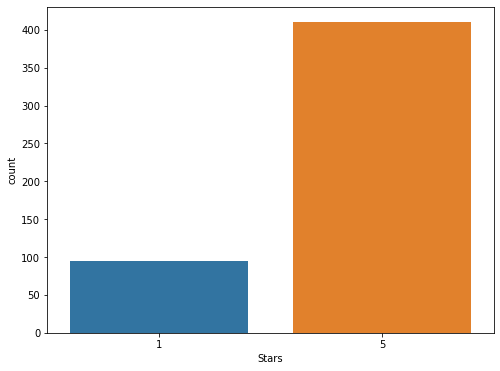

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(customer.Stars)
plt.show()

In [22]:
X = customer['Reviews']
Y = customer['Stars']

In [23]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [24]:
# UDF to find sentiment polarity of the reviews
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'  

In [25]:
# creating dictionary which will contain both the review and the sentiment of the review
final_dictionary = []
for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but 

In [26]:
# Finding positive reviews
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)
print(positive_reviews[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled\xa0together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less', 'Sentimen

In [27]:
# Finding neutral reviews
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:5])

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': "\r\nLending tree matching me up with companies that don't offer the product I requested.\r\n        ", 'Sentiment': 'Neutral'}, {'Review': '\r\nThey called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.\r\n        ', 'Sentiment': 'Neutral'}]


In [28]:
# Finding negative reviews
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)
print(negative_reviews[:5])

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

In [29]:
# counting number of positive,neutral and negative reviews
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [30]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


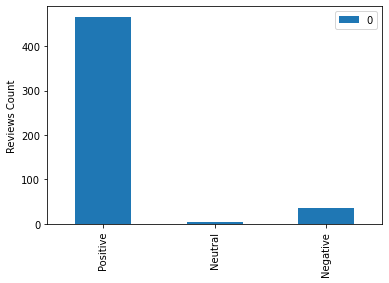

In [31]:
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')   
plt.show()

In [32]:
# printing first five positive reviews
i=1
for review in positive_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!
******************************************************
2
Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!
******************************************************
3
We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindR

In [33]:
# printing first five negative reviews
i=1
for review in negative_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind
******************************************************
2
This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to se

In [34]:
# UDF to clean the reviews
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [35]:
# X = customer['Reviews']
X.head()


0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [36]:
# applying clean_text function defined above to remove punctuation, strip extra spaces and convert each word to lowercase
X = X.apply(lambda y: clean_text(y))

In [37]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

In [38]:
tokens_vect = CountVectorizer(stop_words='english')

In [39]:
token_dtm = tokens_vect.fit_transform(X)
tokens_vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2011',
 '2017',
 '2018',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'a

In [40]:
token_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
len(tokens_vect.get_feature_names())

2507

In [42]:
pd.DataFrame(token_dtm.toarray(),columns = tokens_vect.get_feature_names())

,10,100,101,1014,1031,1040s,11,12,13,15,...,xx,year,years,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print(token_dtm)

  (0, 1022)	1
  (0, 1244)	1
  (0, 2495)	1
  (0, 365)	1
  (0, 1649)	1
  (0, 1739)	1
  (0, 1081)	1
  (0, 1857)	1
  (0, 1727)	1
  (0, 2092)	1
  (0, 2254)	1
  (1, 1739)	1
  (1, 1081)	1
  (1, 2254)	1
  (1, 1423)	2
  (1, 1945)	1
  (1, 1082)	1
  (1, 557)	1
  (1, 1736)	1
  (1, 1487)	1
  (1, 820)	1
  (1, 2037)	1
  (2, 2495)	4
  (2, 365)	1
  (2, 1487)	3
  :	:
  (504, 170)	1
  (504, 2298)	3
  (504, 200)	2
  (504, 1812)	1
  (504, 1827)	1
  (504, 528)	3
  (504, 48)	1
  (504, 929)	1
  (504, 24)	2
  (504, 30)	1
  (504, 55)	2
  (504, 1441)	2
  (504, 1115)	2
  (504, 812)	1
  (504, 239)	1
  (504, 2206)	1
  (504, 2230)	1
  (504, 2229)	2
  (504, 1287)	1
  (504, 829)	1
  (504, 844)	2
  (504, 50)	1
  (504, 1891)	2
  (504, 493)	1
  (504, 685)	1


In [44]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

In [45]:
count_dtm_dataframe.head()

,Word,Count
0,10,10
1,100,9
2,101,1
3,1014,1
4,1031,2


In [46]:
#adding sentiment column which shows sentiment polarity of each word
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

In [47]:
count_dtm_dataframe.head()

,Word,Count,Sentiment
0,10,10,Neutral
1,100,9,Neutral
2,101,1,Neutral
3,1014,1,Neutral
4,1031,2,Neutral


In [48]:
# separating positive words
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [49]:
positive_words_df.head(20)

,Word,Count,Sentiment
1022,great,139,Positive
278,best,99,Positive
1739,professional,70,Positive
746,easy,65,Positive
1095,highly,64,Positive
2257,thanks,61,Positive
2207,sure,51,Positive
64,able,47,Positive
1008,good,39,Positive
1056,happy,37,Positive


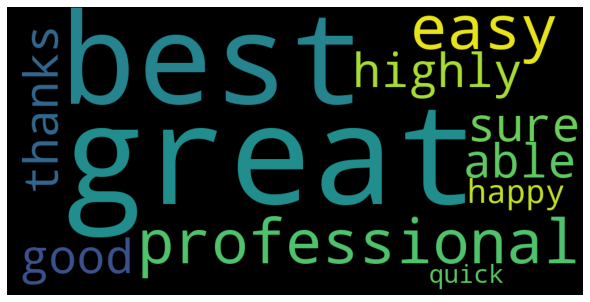

In [50]:
# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [51]:
# separating negative words
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [52]:
negative_words_df.head(10)

,Word,Count,Sentiment
436,closed,68,Negative
858,extremely,46,Negative
1059,hard,40,Negative
1686,poor,32,Negative
489,complicated,18,Negative
1352,little,15,Negative
1715,previous,13,Negative
1619,past,13,Negative
829,expected,11,Negative
2127,spent,11,Negative


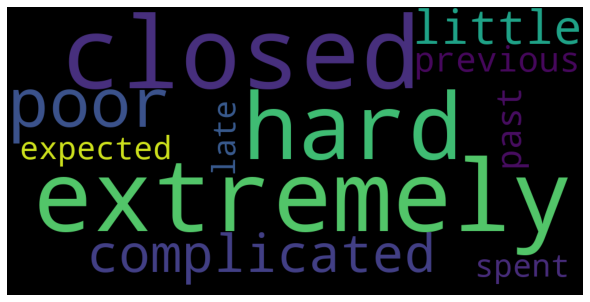

In [53]:
# plotting word cloud of 10 most frequently used negative words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [54]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state = 123, test_size = 0.2)  

In [55]:
vect = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [56]:
train_X_fit = vect.fit(train_X)
train_X_dtm = vect.transform(train_X)
test_X_dtm = vect.transform(test_X)

In [57]:
print(train_X_dtm)

  (0, 31)	1
  (0, 406)	1
  (0, 569)	1
  (0, 892)	1
  (0, 922)	1
  (0, 937)	2
  (0, 946)	1
  (0, 1701)	1
  (0, 2004)	2
  (0, 2041)	1
  (0, 2101)	1
  (0, 2271)	1
  (0, 2298)	1
  (1, 406)	2
  (1, 530)	1
  (1, 630)	2
  (1, 1087)	1
  (1, 1097)	1
  (1, 1320)	1
  (1, 1375)	1
  (1, 1400)	1
  (1, 1657)	1
  (1, 1666)	1
  (1, 2120)	1
  (1, 2130)	1
  :	:
  (402, 1728)	1
  (402, 2130)	1
  (402, 2188)	1
  (402, 2298)	1
  (403, 254)	1
  (403, 337)	1
  (403, 721)	1
  (403, 772)	1
  (403, 824)	1
  (403, 827)	1
  (403, 952)	2
  (403, 1033)	1
  (403, 1233)	1
  (403, 1263)	1
  (403, 1439)	1
  (403, 1628)	1
  (403, 1666)	2
  (403, 1669)	1
  (403, 1686)	1
  (403, 1860)	1
  (403, 1889)	1
  (403, 1906)	1
  (403, 1978)	1
  (403, 2092)	1
  (403, 2293)	1


In [58]:
print(test_X_dtm)

  (0, 389)	1
  (0, 694)	1
  (0, 738)	1
  (0, 857)	1
  (0, 1263)	2
  (0, 1597)	2
  (0, 1651)	1
  (0, 1844)	1
  (0, 2299)	1
  (1, 65)	1
  (1, 210)	1
  (1, 236)	1
  (1, 261)	1
  (1, 316)	1
  (1, 411)	1
  (1, 596)	1
  (1, 621)	1
  (1, 655)	1
  (1, 688)	1
  (1, 752)	3
  (1, 811)	1
  (1, 846)	1
  (1, 853)	1
  (1, 999)	1
  (1, 1181)	1
  :	:
  (99, 2309)	1
  (100, 59)	1
  (100, 139)	1
  (100, 222)	1
  (100, 322)	1
  (100, 795)	1
  (100, 796)	1
  (100, 894)	1
  (100, 946)	1
  (100, 1000)	1
  (100, 1003)	1
  (100, 1027)	1
  (100, 1181)	1
  (100, 1349)	1
  (100, 1483)	1
  (100, 1564)	1
  (100, 1597)	1
  (100, 1650)	1
  (100, 1677)	1
  (100, 2063)	1
  (100, 2092)	1
  (100, 2101)	1
  (100, 2116)	1
  (100, 2236)	1
  (100, 2278)	1


In [59]:
vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2011',
 '2017',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'adverti

In [60]:
print('No.of features for are',len(vect.get_feature_names()))

No.of features for are 2326


In [61]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns=vect.get_feature_names())

In [62]:
train_X_dtm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,...,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Finding how many times a tem is used in corpus
train_dtm_freq = np.sum(train_X_dtm_df,axis=0)

In [64]:
train_dtm_freq.head(20)

10       7
100      7
101      1
1014     1
1031     2
1040s    1
11       6
12       4
13       3
15       5
18       1
19th     1
1st      2
20       3
200      1
2005     1
2011     1
2017     1
20k      2
212      3
dtype: int64

In [65]:
# building naive bayes model on DTM
naive_model = MultinomialNB()
naive_model.fit(train_X_dtm,train_Y)

MultinomialNB()

In [66]:
predict_train = naive_model.predict(train_X_dtm)
predict_test = naive_model.predict(test_X_dtm)

In [67]:
len(predict_test)

101

In [68]:
print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

Accuracy on train:  0.9900990099009901
Accuracy on test:  0.9801980198019802


In [69]:
# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_X_dtm)[:,1]
predict_prob_test = naive_model.predict_proba(test_X_dtm)[:,1]

In [70]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

ROC_AUC score on train:  0.9962667302116843
ROC_AUC score on test:  0.9866131191432396


In [71]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test,[5,1])

G:\New folder\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[5, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [72]:
cm_test

array([[82,  1],
       [ 1, 17]], dtype=int64)

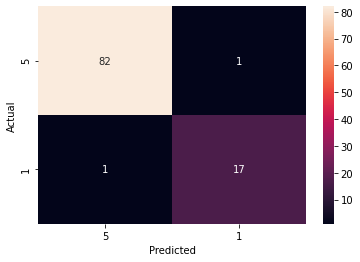

In [73]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()